# **Nivell 1**  
Realiza la conexión en Python con el MySQL Workbench para cargar toda la información que tienes en las tablas. 

In [676]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [608]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

try:
    connection = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Data75000',
        database='sales'
    )
    
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        
        cursor = connection.cursor()
        
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print("You're connected to database: ", record[0])
        
        cursor.execute("SHOW TABLES")
        tablas = cursor.fetchall()
        print("Tablas disponibles:", tablas)
        
        tablas_dict = {}  # Diccionario para almacenar DataFrames
        for (tabla,) in tablas:  # Cada elemento en 'tablas' es una tupla
            print(f"Cargando datos de la tabla: {tabla}")
            query = f"SELECT * FROM {tabla}"
            
            cursor.execute(query)
            rows = cursor.fetchall()
            column_names = [desc[0] for desc in cursor.description]
            
            tablas_dict[tabla] = pd.DataFrame(rows, columns=column_names)
        
        print("Datos cargados correctamente en DataFrames.")
        
except Error as e:
    print("Error while connecting to MySQL:", e)

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")



Connected to MySQL Server version  8.0.40
You're connected to database:  sales
Tablas disponibles: [('cc_state',), ('companies',), ('credit_cards',), ('product_sold',), ('products',), ('transactions',), ('users',)]
Cargando datos de la tabla: cc_state
Cargando datos de la tabla: companies
Cargando datos de la tabla: credit_cards
Cargando datos de la tabla: product_sold
Cargando datos de la tabla: products
Cargando datos de la tabla: transactions
Cargando datos de la tabla: users
Datos cargados correctamente en DataFrames.
MySQL connection is closed


In [610]:
# Obtener información y crear DataFrames individuales a partir de tablas_dict
for tabla_nombre, tabla_df in tablas_dict.items():
    globals()[tabla_nombre] = tabla_df
    
    print(f"Información de la tabla: {tabla_nombre}")
    print(tabla_df.info())  
    
    print(f"Primeras 5 filas de la tabla {tabla_nombre}:")
    display(tabla_df.head(5).style.set_table_styles(
        [{'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center')]},
         {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'left')]}]
    ))
    print("\n")
del tabla_df


Información de la tabla: cc_state
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   card_id   275 non-null    object
 1   cc_state  275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB
None
Primeras 5 filas de la tabla cc_state:


,card_id,cc_state
0,CcU-2938,Activa
1,CcU-2945,Activa
2,CcU-2952,Activa
3,CcU-2959,Activa
4,CcU-2966,Activa




Información de la tabla: companies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None
Primeras 5 filas de la tabla companies:


,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings




Información de la tabla: credit_cards
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    object
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    object
 5   cvv            275 non-null    object
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: object(9)
memory usage: 19.5+ KB
None
Primeras 5 filas de la tabla credit_cards:


,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24




Información de la tabla: product_sold
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB
None
Primeras 5 filas de la tabla product_sold:


,transaction_id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
1,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1
2,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1
3,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1
4,1EA2B262-D507-AD14-4374-4D532967113F,1




Información de la tabla: products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    object 
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB
None
Primeras 5 filas de la tabla products:


,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1.000000,WH-4
1,10,Karstark Dorne,$119.52,#f4f4f4,2.400000,WH--5
2,100,south duel,$40.43,#6d6d6d,3.000000,WH--95
3,11,Karstark Dorne,$49.70,#141414,2.700000,WH--6
4,12,duel Direwolf,$181.60,#a8a8a8,2.100000,WH--7




Información de la tabla: transactions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    object        
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    object        
 8   lat          587 non-null    object        
 9   longitude    587 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 46.0+ KB
None
Primeras 5 filas de la tabla transactions:


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9184589824,-12.5275561984
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9694885888,-117.5251835904
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222680576,-129.049879552
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593055232,-100.555928064
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381445632,158.298210304




Información de la tabla: users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    object
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: object(10)
memory usage: 21.6+ KB
None
Primeras 5 filas de la tabla users:


,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,"Apr 30, 1984",United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St."
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,"Sep 15, 1989",United States,College,11838,Ap #644-8492 Sagittis St.
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,"Apr 9, 1983",United States,Great Falls,67129,"665-9047 In, Rd."
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,"Apr 16, 1982",United States,Columbus,11595,Ap #374-7325 Sodales Rd.


Realizo varios cambios con los datos:
- convierto 'amount' a float
- convierto 'birth_date' a datetime
- calculo edad de usuarios
- el precio y el peso del producto convierto a un numero sin $

In [612]:
transactions["amount"] = transactions["amount"].astype(float)
transactions['timestamp'] = pd.to_datetime(transactions['timestamp'])

print("\nUpdated 'transactions' DataFrame stored in tablas_dict:")
print(tablas_dict['transactions'].info())
print("\n")
display(tablas_dict['transactions'].head(5).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center')]},
     {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'left')]}]
    ))



Updated 'transactions' DataFrame stored in tablas_dict:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    object        
 8   lat          587 non-null    object        
 9   longitude    587 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 46.0+ KB
None




,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.920000,0,"71, 1, 19",92,81.9184589824,-12.5275561984
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.530000,0,"47, 97, 43",170,-43.9694885888,-117.5251835904
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.610000,0,"47, 67, 31, 5",275,-81.222680576,-129.049879552
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.180000,0,"89, 83, 79",265,-34.3593055232,-100.555928064
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.930000,0,"43, 31",92,33.7381445632,158.298210304


In [614]:
# en "users" convertimos 'birth_date' a datetime
users["birth_date"] = pd.to_datetime(users["birth_date"], format='%b %d, %Y')

# calculo de edad 
from datetime import date
def calculate_age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age
    
# añadimos un campo nuevo 'age'
users['age'] = users['birth_date'].apply(calculate_age)
tablas_dict['users'] = users

# comprobamos el resultado
print("\nUpdated 'users' DataFrame stored in tablas_dict:")
print(tablas_dict['users'].info())
print("\n")
display(users.head(5).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center')]},
     {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'left')]}]
    ))



Updated 'users' DataFrame stored in tablas_dict:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    object        
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
 10  age          275 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.8+ KB
None




,id,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17 00:00:00,United States,Lowell,73544,348-7818 Sagittis St.,39
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,1984-04-30 00:00:00,United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St.",40
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,1989-09-15 00:00:00,United States,College,11838,Ap #644-8492 Sagittis St.,35
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,1983-04-09 00:00:00,United States,Great Falls,67129,"665-9047 In, Rd.",41
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,1982-04-16 00:00:00,United States,Columbus,11595,Ap #374-7325 Sodales Rd.,42


In [616]:
# en "products" campos "price" y "weight" son de tipo "object" y además "price" tiene el simbolo $
products["price"] = products["price"].astype(str)
products["price"] = products["price"].str.replace(r"[$]", "", regex=True).astype(float)
products["weight"] = products["weight"].astype(float)

# Mostrar cambios hechos en DataFrame
print("\nUpdated 'products' DataFrame stored in tablas_dict:")
print(tablas_dict['products'].info())
print("\n")
display(tablas_dict['products'].head(5).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center')]},
     {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'left')]}]
    ))



Updated 'products' DataFrame stored in tablas_dict:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB
None




,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.110000,#7c7c7c,1.000000,WH-4
1,10,Karstark Dorne,119.520000,#f4f4f4,2.400000,WH--5
2,100,south duel,40.430000,#6d6d6d,3.000000,WH--95
3,11,Karstark Dorne,49.700000,#141414,2.700000,WH--6
4,12,duel Direwolf,181.600000,#a8a8a8,2.100000,WH--7


# Realizarás una visualización para cada ejercicio.  
Comenta lo que te llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

- Ejercicio 1
Una variable numérica.

- Ejercicio 2
Dos variables numéricas.

- Ejercicio 3
Una variable categórica.

- Ejercicio 4
Una variable categórica y una numérica.

- Ejercicio 5
Dos variables categóricas.

- Ejercicio 6
Tres variables.

- Ejercicio 7
Graficar un Pairplot.

Voy a unir en un dataframe los datos de **transactios**, **companies** y **users** para luego hacer los graficos con differentes variables 

In [618]:
# Merge transactions with companies
merged_df = pd.merge(
    tablas_dict['transactions'], 
    tablas_dict['companies'], 
    left_on='business_id', 
    right_on='company_id', 
    how='inner', 
    suffixes=('_transaction', '_company')
)

# Merge the resulting merged_df with users
merged_df = pd.merge(
    merged_df, 
    tablas_dict['users'], 
    left_on='user_id', 
    right_on='id',     
    how='inner', 
    suffixes=('', '_user'))

# Añadimos campos
merged_df['year_month'] = merged_df['timestamp'].dt.to_period('M').astype(str)
merged_df['year'] = merged_df['timestamp'].dt.year
merged_df['month'] = merged_df['timestamp'].dt.month
merged_df['declined_status'] = merged_df['declined'].map({0: 'Accepted', 1: 'Declined'})
merged_df["user_id"] = pd.to_numeric(merged_df["user_id"], errors='coerce').astype('Int64')
merged_df=merged_df.drop('id_user', axis=1)

# Display the final merged DataFrame
print("\nMerged DataFrame:")
print(merged_df.info())
print("\n")
merged_df



Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               587 non-null    object        
 1   card_id          587 non-null    object        
 2   business_id      587 non-null    object        
 3   timestamp        587 non-null    datetime64[ns]
 4   amount           587 non-null    float64       
 5   declined         587 non-null    int64         
 6   product_ids      587 non-null    object        
 7   user_id          587 non-null    Int64         
 8   lat              587 non-null    object        
 9   longitude        587 non-null    object        
 10  company_id       587 non-null    object        
 11  company_name     587 non-null    object        
 12  phone            587 non-null    object        
 13  email            587 non-null    object        
 14  country          587 no

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,birth_date,country_user,city,postal_code,address,age,year_month,year,month,declined_status
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9184589824,-12.5275561984\r,...,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,2021-08,2021,8,Accepted
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9694885888,-117.5251835904\r,...,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,37,2021-07,2021,7,Accepted
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222680576,-129.049879552\r,...,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42,2022-01,2022,1,Accepted
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593055232,-100.555928064\r,...,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26,2022-01,2022,1,Accepted
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381445632,158.298210304\r,...,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,2021-10,2021,10,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.3194717184,-11.4134912\r,...,1991-04-16,Canada,Tuktoyaktuk,Q4C 3G7,"P.O. Box 496, 5145 Sapien Road",33,2022-03,2022,3,Accepted
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.012168192,-64.671543808\r,...,1994-12-21,Canada,Baddeck,B4R 5C5,"P.O. Box 306, 6953 At Street",30,2022-03,2022,3,Accepted
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.8604531712,-172.3457293312\r,...,1992-03-23,Canada,Lourdes,B0R 4L1,6491 Cursus St.,32,2021-06,2021,6,Accepted
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.0751433728,-142.2416956416\r,...,1993-12-21,United Kingdom,Banchory,U8H 7PH,"P.O. Box 202, 5638 Mi Rd.",31,2021-11,2021,11,Accepted


Guardamos el dataframe **merged_df** a un archivo .cvs si lo necesitamos luego

In [620]:
merged_df.to_csv("transactios_companies_users.csv",index=False)

Comprobamos si ha guardado bien

In [27]:
#merged_df_1=pd.read_csv("transactios_companies_users.csv")
#merged_df_1

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,birth_date,country_user,city,postal_code,address,age,year_month,year,month,declined_status
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.918459,-12.527556,...,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,2021-08,2021,8,Accepted
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.969489,-117.525184,...,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,37,2021-07,2021,7,Accepted
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222681,-129.049880,...,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42,2022-01,2022,1,Accepted
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.359306,-100.555928,...,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26,2022-01,2022,1,Accepted
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.738145,158.298210,...,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,2021-10,2021,10,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.319472,-11.413491,...,1991-04-16,Canada,Tuktoyaktuk,Q4C 3G7,"P.O. Box 496, 5145 Sapien Road",33,2022-03,2022,3,Accepted
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.012168,-64.671544,...,1994-12-21,Canada,Baddeck,B4R 5C5,"P.O. Box 306, 6953 At Street",30,2022-03,2022,3,Accepted
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.860453,-172.345729,...,1992-03-23,Canada,Lourdes,B0R 4L1,6491 Cursus St.,32,2021-06,2021,6,Accepted
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.075143,-142.241696,...,1993-12-21,United Kingdom,Banchory,U8H 7PH,"P.O. Box 202, 5638 Mi Rd.",31,2021-11,2021,11,Accepted


In [680]:
# Группировка по возрасту (age), подсчет количества id и округление суммы (amount)
result = merged_df.groupby('age').agg(
    id_count=('id', 'count'),  # Подсчет количества id
    amount_rounded=('amount', lambda x: round(x.sum(), 0)) # Округление суммы
    
).reset_index()

print(result)

    age  id_count  amount_rounded
0    23        24          5141.0
1    24        27          5989.0
2    25         3           844.0
3    26        18          4178.0
4    27        14          3831.0
5    28        16          3865.0
6    29         9          2838.0
7    30        18          5383.0
8    31        14          3923.0
9    32        11          3643.0
10   33       141         35019.0
11   34        18          5238.0
12   35        18          3900.0
13   36        38         10832.0
14   37        24          6539.0
15   38        19          3850.0
16   39         8          2320.0
17   40        51         13546.0
18   41        22          6466.0
19   42        55         13539.0
20   43        19          4887.0
21   44        12          2823.0
22   45         8          2110.0


Summary of Common Plotting Functions:  
plt.plot(): Line plot  
plt.bar(): Bar chart  
plt.hist(): Histogram  
plt.scatter(): Scatter plot  
plt.pie()	Pie charts  
plt.subplot(): Multiple subplots  
plt.title(): Title of the plot  
plt.xlabel(), plt.ylabel(): Axis labels  
plt.legend(): Legend  
plt.show(): Display the plot  
plt.savefig(): Save the plot to a file  
plt.grid()	Add grid lines


## **Ejercicio 1** Una variable numérica

Analizamos el importe de las transacciones

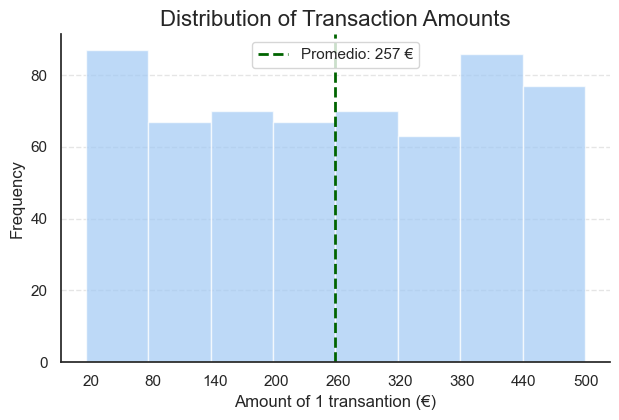

In [400]:
sns.set(style="white")
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
bins = 8 
# Marcas en el eje X ajustamos a valores de los bins
    # plt.hist(data, bins=8) devuelve tres objetos:
    # frequencies (índice [0]): contiene la cantidad de observaciones en cada uno de los bins o intervalos
    # bin_edges (índice [1]): los bordes de los bins
    # patches (índice [2]): los objetos visualizados como las barras del histograma
bin_edges = plt.hist(merged_df['amount'], bins=bins, alpha=0.7)[1]           
bin_edges_int = np.round(bin_edges,-1)
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Amount of 1 transantion (€)')
plt.ylabel('Frequency')
plt.xticks(bin_edges_int)
plt.grid(axis='y', linestyle='--', alpha=0.5)                                                      

mean_amount = np.round(merged_df['amount'].mean())
plt.axvline(mean_amount, color='darkgreen', linestyle='--', linewidth=2, label=f'Promedio: {mean_amount:.0f} €')
plt.legend(loc='upper center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout(pad=0)
plt.show()


### Análisis del gráfico  
El gráfico muestra la distribución de los montos de las transacciones en el conjunto de datos, destacando patrones importantes en el comportamiento de los clientes.

En general, los importes de las transacciones varían entre 0 y 500 euros, con frecuencias que oscilan entre 60 y 90 transacciones.

La distribución no es uniforme:
- Se observa una alta concentración de transacciones en los intervalos de 0 a 80 euros y 380 a 500 euros (aproximadamente). 
- Los productos más vendidos tienden a ser los más baratos o los más caros.
- Los montos entre 80 y 380 euros (aproximadamente) muestran una frecuencia más uniforme, aunque menor en comparación con los extremos.

Esto sugiere dos segmentos de clientes principales:
- Aquellos que buscan productos económicos.
- Aquellos dispuestos a invertir en productos de gama alta.
Sería útil identificar los productos que se ajustan a estos rangos populares (0-80 € y 380-500 €) y analizar las causas detrás de la menor frecuencia de ventas en el rango intermedio (80-380 €), como posibles problemas de precio o marketing.

Una estrategia interesante podría ser ofrecer promociones combinadas, uniendo productos populares con aquellos de menor frecuencia de ventas. Por ejemplo, si el cliente adquiere un producto premium, ofrecer un descuento en un producto económico menos vendido.

## **Ejercicio 2** Dos variables numéricas  

Variables escogidas son de la tabla productos: age y amount

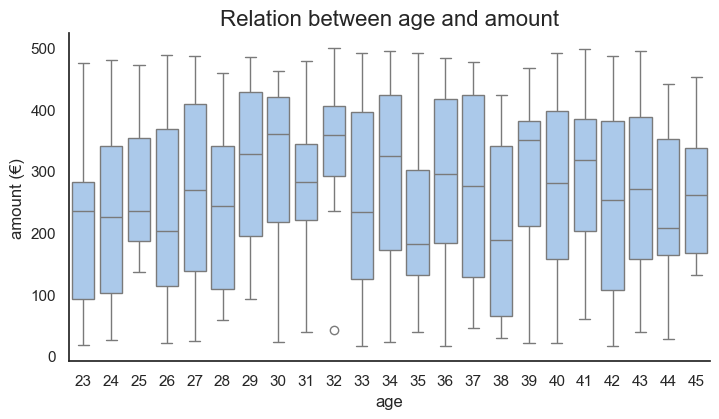

In [636]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=merged_df, x='age', y='amount')
plt.title('Relation between age and amount', fontsize=16)
plt.xlabel('age')
plt.ylabel('amount (€)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout(pad=0)
plt.show()

### Análisis del gráfico  
El gráfico de caja (boxplot) de la relación entre la edad y el monto de las transacciones muestra que, en general, las transacciones están bastante distribuidas a lo largo de todas las edades, con variaciones significativas en los valores. Parece que las edades intermedias (aproximadamente entre 30 y 40 años) tienden a tener valores más consistentes y menos dispersos en comparación con los rangos de edad más extremos.

La mediana de los montos tiende a estar en un rango intermedio para la mayoría de las edades, pero las edades más jóvenes y más viejas parecen tener más variabilidad. Esto puede indicar que los clientes más jóvenes tienden a realizar compras más pequeñas, mientras que los más mayores tienen una mayor dispersión. 

Una estrategia eficaz podría ser segmentar a los clientes en grupos de edad más amplios, como 21-25, 26-30, 31-35, para entender mejor los patrones de compra de cada grupo. Para los más jóvenes, podrían implementarse campañas de ventas con precios más accesibles o incentivos de fidelidad, mientras que para los grupos mayores se podrían diseñar promociones de productos premium o servicios especializados. 

## **Ejercicio 3** Una variable categórica

Tomamos **el nombre de la compañía** como una variable categórica.
Las compañias cuaya contribución al total de amount es inferior al 5% agrupamos bajo la categoría "Others".

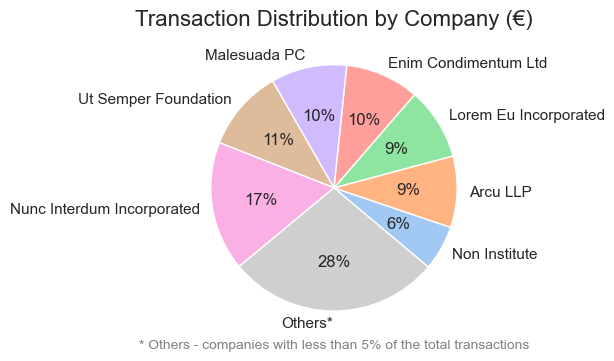

In [640]:
sns.set(style="white")
sns.set_palette("pastel")
plt.figure(figsize=(4,4))

total_amount = merged_df['amount'].sum()
df_pie=merged_df.groupby([ 'company_name'])['amount'].sum().reset_index()
df_pie['category'] = np.where(df_pie['amount'] < 0.05 * total_amount, 'Others*', None)
df_pie['company_name'] = np.where(df_pie['category'] == 'Others*', 'Others*', df_pie['company_name'])
df_pie = df_pie.groupby('company_name')['amount'].sum().reset_index()
df_pie=df_pie.sort_values(by='amount', ascending=True)
plt.pie(df_pie['amount'], labels=df_pie['company_name'], autopct='%1.0f%%',startangle=-40)
plt.title('Transaction Distribution by Company (€)', fontsize=16)
plt.text(0, -1.3, '* Others - companies with less than 5% of the total transactions', 
         fontsize=10, ha='center', color='gray')
plt.show()


### Análisis del gráfico  
El gráfico presenta la proporción de transacciones por compañía, revelando una cartera equilibrada con un grupo significativo de compañías pequeñas y varios clientes principales.  

Las 7 principales compañías representan el 72% del total de transacciones, con participaciones individuales entre el 6% y el 17%. La mayor de ellas, "Nunc Interdum Incorporated", concentra el 17%, lo que la posiciona como un cliente clave. Se recomienda establecer estrategias de fidelización para asegurar la continuidad de las transacciones con estas compañías principales.  

El grupo "Others" incluye empresas con menos del 5% de las transacciones, pero su aporte combinado (28%) es significativo. Este segmento representa una oportunidad de crecimiento importante.  
Se propone:
- Identificar las compañías dentro del grupo "Others" para analizar patrones comunes, sectores de interés o posibles oportunidades de expansión.  
- Segmentar adicionalmente el grupo para priorizar aquellas empresas más prometedoras y diseñar estrategias específicas de crecimiento.  

## **Ejercicio 4** Una variable categórica y una numérica  

Para este ejercicio, he utilizado **la variable numérica Transaction Amount** y la he analizado en relación con **una variable categórica, el mes de la transacción**. Además, para profundizar en este análisis, he añadido **una línea de tendencia** con el fin de ilustrar la evolución mensual de las ventas.

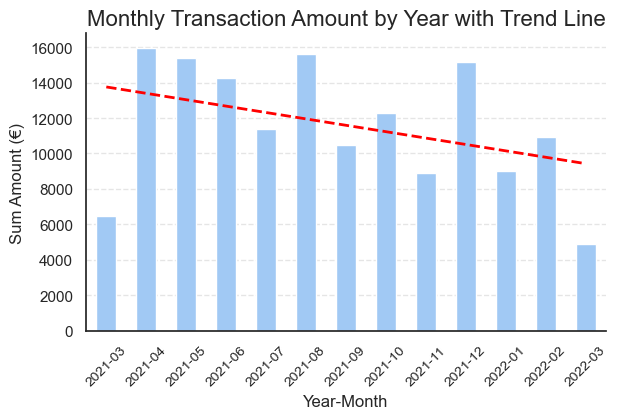

In [406]:
sns.set(style="white")
sns.set_palette("pastel")
# PARTE 1 - GRAFICO DE BARRAS
monthly_sales = merged_df.groupby('year_month')['amount'].sum()
plt.figure(figsize=(6, 4))
monthly_sales.plot(kind='bar')

# PARTE 2 OPCIONAL - LINEA TREND
import numpy as np
from sklearn.linear_model import LinearRegression 

# Convertimos las etiquetas de 'year_month' a valores numéricos para la regresión
numeric_time = np.arange(len(monthly_sales)) # Un arreglo unidimensional (1D) 
# print(numeric_time)
# [ 0  1  2  3  4  5  6  7  8  9 10 11 12]

# Ajustamos un modelo de regresión lineal
# Usamos LinearRegression de scikit-learn para encontrar la relación entre el tiempo (índices numéricos) y los montos de ventas
model = LinearRegression()

X = numeric_time.reshape(-1, 1)  #  #Transforma de [1, 2, 3, 4, 5] a [[1], [2], [3], [4], [5]]

"""
 print(X)
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
"""
y = monthly_sales.values.reshape(-1, 1)  # hacemos transformacion de  (1D, tamaño (n,)) a  (2D, tamaño (n, 1))
model.fit(X, y)
trend_line = model.predict(X)
plt.plot(monthly_sales.index, trend_line.flatten(), color='red', linestyle='--', linewidth=2, label='Trend Line')

plt.title('Monthly Transaction Amount by Year with Trend Line', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Sum Amount (€)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', visible=False)  
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout(pad=0)
plt.show()


In [338]:
# Trend analisys
df_trend = pd.DataFrame({
    'Month-Year': monthly_sales.index,  # Periodo 'YYYY-MM'
    'Numeric Time': numeric_time,        # Valores numéricos de tiempo
    'Sales Amount (€)': np.round(monthly_sales.values),  # Ventas reales
    'Predicted Sales (€)': np.round(trend_line.flatten())  # Ventas predichas por el modelo
})

print(df_trend)

   Month-Year  Numeric Time  Sales Amount (€)  Predicted Sales (€)
0     2021-03             0            6472.0              13758.0
1     2021-04             1           15980.0              13397.0
2     2021-05             2           15364.0              13036.0
3     2021-06             3           14241.0              12675.0
4     2021-07             4           11374.0              12314.0
5     2021-08             5           15608.0              11953.0
6     2021-09             6           10503.0              11593.0
7     2021-10             7           12281.0              11232.0
8     2021-11             8            8889.0              10871.0
9     2021-12             9           15162.0              10510.0
10    2022-01            10            8990.0              10149.0
11    2022-02            11           10941.0               9788.0
12    2022-03            12            4898.0               9428.0


### Análisis del gráfico

El gráfico presenta la evolución de las ventas mensuales en euros durante un período determinado, junto con una línea de tendencia calculada mediante regresión lineal.

Se observa una notable fluctuación mensual, destacando picos en las ventas durante **abril, mayo, junio, agosto y diciembre de 2021**. En cambio, los meses de **marzo y octubre de 2021, así como los primeros tres meses de 2022**, muestran un volumen de ventas significativamente más bajo, lo que sugiere una disminución en esos períodos.

La **línea de tendencia descendente** indica una ligera disminución general en las ventas a lo largo del tiempo, lo que podría reflejar un cambio en la demanda o problemas internos de la empresa que están afectando el rendimiento de las ventas.

Además, se puede identificar una **posible estacionalidad**, con picos de ventas en diciembre, probablemente relacionados con las compras navideñas, y caídas en los meses de verano (junio-agosto), lo que podría estar vinculado a patrones estacionales de consumo.

Sería relevante **identificar los productos clave** que impulsan los picos de ventas en los meses de mayor rendimiento. También sería útil estudiar la oferta de productos durante los meses de baja demanda para determinar si ciertos artículos no están generando suficiente interés.

En resumen, el análisis de las ventas mensuales revela patrones claros de alta y baja demanda, junto con una tendencia descendente que requiere atención. Aprovechar los picos de ventas y mejorar los meses más débiles, mediante un análisis más detallado de la oferta y la demanda, podría ser fundamental para revertir la tendencia negativa y mejorar los resultados generales de la empresa.


## **Ejercicio 5** Dos variables categóricas

Para este ejercicio, he utilizado las variables **declined** de la tabla transactions y **country** de la tabla companies. Estas se analizaron mediante un **gráfico de barras**, lo que nos permitió visualizar la distribución de transacciones aceptadas y rechazadas en función del país.

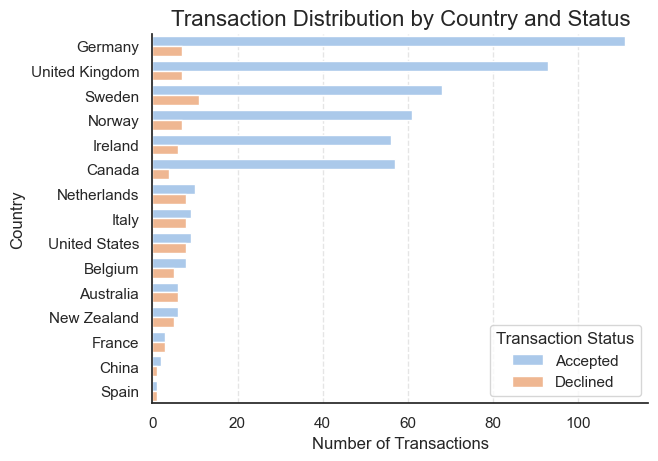

In [354]:
sns.set_theme(style="white", palette='pastel')
sns.barplot(merged_df, x="amount", y="country", estimator="count", hue="declined_status" , order = merged_df['country'].value_counts().index,errorbar=None)
plt.title('Transaction Distribution by Country and Status', fontsize=16)
plt.ylabel('Country')
plt.xlabel('Number of Transactions')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', visible=False)         
plt.legend(title='Transaction Status')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


### Análisis del gráfico
El gráfico muestra la distribución de la cantidad de transacciones por país, ordenadas de mayor a menor. Alemania lidera con la mayor cantidad de transacciones, seguida por el Reino Unido y Suecia. En el extremo inferior se encuentran países como Francia, China y España, con una participación baja.

Alemania y Reino Unido destacan como mercados clave, lo que sugiere la importancia de profundizar en su análisis para identificar productos más vendidos y oportunidades de optimización. Suecia, Noruega, Irlanda y Canadá presentan actividad intermedia y podrían tener potencial de crecimiento mediante estrategias específicas. En cambio, países como Francia, China y España tienen baja actividad, lo que podría deberse a barreras culturales, económicas o de alcance. Investigar las causas de esta baja participación y desarrollar campañas dirigidas sería crucial. 

Para los mercados más activos, sería recomendable mantener la lealtad del cliente mediante promociones personalizadas, mientras que en los mercados menos activos, explorar campañas de marketing localizadas, alianzas estratégicas o la introducción de productos asequibles podría mejorar los resultados.

El gráfico y los datos proporcionados muestran la **distribución de transacciones aceptadas y rechazadas por país**, ofreciendo una visión general de los niveles de actividad en cada región y posibles problemas en el procesamiento de pagos.

**Alemania, Reino Unido y Suecia**:
Representan los mayores volúmenes de transacciones aceptadas.

**Canadá, Noruega e Irlanda**:
Volúmenes aceptables con bajos rechazos. Tienen un potencial de expansión interesante gracias a las tasas controladas de fallos.

**Italia, Países Bajos y Estados Unidos**:
Alta proporción de rechazos, con casi tantas transacciones fallidas como aceptadas. Podría deberse a problemas técnicos o políticas restrictivas de aprobación.

**China, Francia y España**:
Bajos volúmenes totales, reflejando falta de penetración o promoción en estas regiones.

Se recomienda:
 - Realizar un análisis detallado en países como los Países Bajos, Italia y Estados Unidos para identificar las causas detrás de los rechazos. Esto podría incluir políticas de aprobación, posibles fraudes o problemas técnicos.
 - Optimizarlos sistemas de pago y garantizar que sean compatibles con los métodos de pagomásutilizados en cada mercado.
 - Implementar notificaciones automáticas que informen a los clientes sobre rechazos y ofrezcan soluciones inmediatas para completar las transacciones


## **Ejercicio 6** Tres variables

Para este ejercicio, hemos utilizado **la variable numérica Transaction Amount** y la hemos analizado en relación con **una variable categórica** creada a partir **de la agrupación de edades** en rangos de 5 años. Esta segmentación nos permite identificar patrones y tendencias específicas según los grupos etarios. Además, hemos incorporado una tercera variable: **el número de clientes únicos**, que también se ha analizado en función de los grupos de edad.

In [419]:
merged_df['age'].min()

23

In [421]:
merged_df['age'].max()

45

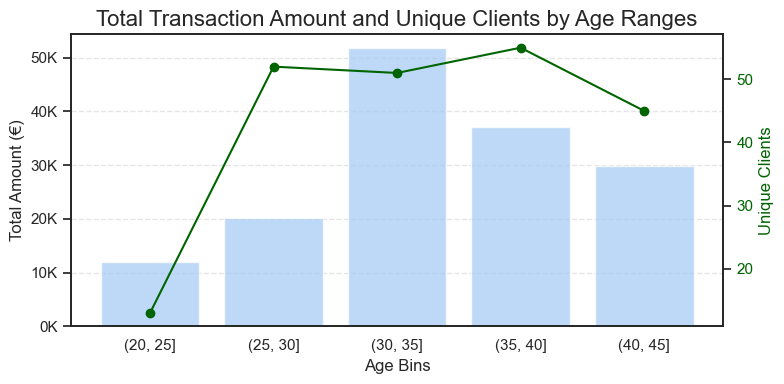

In [690]:
from matplotlib.ticker import FuncFormatter

# bins for age, step 5 years
# range (start, stop, step)
age_bins = range(merged_df['age'].min() - (merged_df['age'].min() % 5), merged_df['age'].max() + 5, 5)
merged_df['age_bin'] = pd.cut(merged_df['age'], bins=age_bins)

# Group by age bins and calculate the metrics
# observed=False: sin vacios
# observed=True: con vacios (sin datos)
grouped_data = merged_df.groupby('age_bin',observed=True).agg(
    total_amount=('amount', 'sum'),
    unique_clients=('user_id', 'nunique')  # 'nunique' to count unique values
).reset_index()

sns.set_theme(style="white", palette='pastel')
fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar plot for total amount
ax1.bar(grouped_data['age_bin'].astype(str), grouped_data['total_amount'], alpha=0.7)
ax1.set_ylabel('Total Amount (€)')
# Añadir divisiones en miles
formatter = FuncFormatter(lambda x, pos: f'{int(x / 1000)}K')  # Dividir por 1000 y mostrar "K"
ax1.yaxis.set_major_formatter(formatter)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', visible=False)         

# Line plot for unique clients
ax2 = ax1.twinx()
ax2.plot(grouped_data['age_bin'].astype(str), grouped_data['unique_clients'], color='darkgreen', marker='o', label='Unique Clients')
ax2.set_ylabel('Unique Clients', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Total Transaction Amount and Unique Clients by Age Ranges', fontsize=16)
ax1.set_xlabel('Age Bins')
fig.tight_layout()
plt.show()


In [688]:
print(grouped_data)

    age_bin  total_amount  unique_clients
0  (20, 25]      11973.82              13
1  (25, 30]      20095.80              52
2  (30, 35]      51722.30              51
3  (35, 40]      37087.91              55
4  (40, 45]      29823.92              45



### Análisis del gráfico
**Monto total por grupo de edad**:  
- El grupo de edad de **30-35 años** genera el monto total más alto (51,722.30 €), lo que indica que es el segmento más activo o el que realiza transacciones de mayor valor.  
- Los grupos de edad en los extremos (**20-25 años** y **40-45 años**) generan ingresos significativamente menores, con el grupo de **20-25 años** siendo el de menor aporte (12,006.92 €).  

**Clientes únicos por grupo de edad**:  
- El segmento con mayor cantidad de clientes únicos es el de **35-40 años** (57 clientes), seguido por los grupos de **30-35 años** y **25-30 años**, ambos con 51 clientes únicos.  
- A pesar de que el grupo de **30-35 años** lidera en monto total de transacciones, no supera al grupo de **35-40 años** en cantidad de clientes únicos, lo que sugiere que las transacciones en el segmento de **30-35 años** tienen un valor promedio más alto.  

**Patrones de gasto por edad y posibles estrategias**:  
- El grupo de edad de **30-35 años** es el más lucrativo y debe ser priorizado en futuras estrategias. Sería útil analizar a fondo los productos o servicios que están impulsando este comportamiento.  
- El grupo de **35-40 años** tiene más clientes únicos pero gasta menos en promedio, lo que representa una oportunidad para incrementar el ticket promedio a través de promociones específicas o estrategias de venta cruzada.  
- Los grupos más jóvenes (**20-25 años**) y mayores (**40-45 años**) generan menos ingresos, probablemente debido a factores como menor poder adquisitivo o menor interés en los productos ofrecidos.  
- Se recomienda desarrollar campañas dirigidas al grupo de **20-25 años** para incentivar más compras o incrementar el valor promedio de las transacciones, especialmente a través de productos accesibles o promociones específicas.  

## **Ejercicio 7** Graficar un Pairplot

Graficamos la relacion entre las variables **amount** y **month**, diferenciadas según el año.

In [674]:
merged_df['month'].value_counts()

month
4     65
8     57
5     56
12    56
7     51
6     49
3     47
10    46
2     44
1     40
9     39
11    37
Name: count, dtype: int64

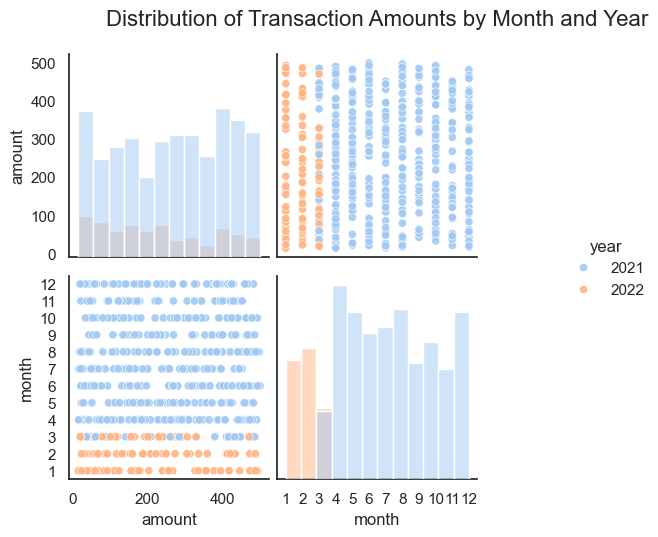

In [672]:
sns.set(style="white")
sns.set_palette("pastel")
# Seleccionamos columnas relevantes para el análisis sin codificar texto innecesariamente
pairplot_df = merged_df[['amount', 'year', 'month']]
pairplot_df=pairplot_df.sort_values(by='month', ascending=True)
# Creamos el pairplot con 'hue' basado en texto directamente (países)
g = sns.pairplot(pairplot_df, hue='year', palette='pastel', diag_kind="hist",diag_kws=dict(fill=True, bins=12), plot_kws={'alpha': 0.9})
# Establecer ticks personalizados para el eje y (mes)
# Ajustar los ticks para que las etiquetas de los meses estén centradas
for ax in g.axes.flatten():
    if ax.get_xlabel() == 'month':  # Ajuste en el eje X
        ax.set_xticks(range(1, 13))  # Colocar los números de los meses (1-12)
        ax.set_xticklabels(range(1, 13))  # Etiquetas de los meses
        ax.set_xlim(0.5, 12.5)  # Ajustar los límites para que no se recorten
    if ax.get_ylabel() == 'month':  # Ajuste en el eje Y
        ax.set_yticks(range(1, 13))  # Colocar los números de los meses (1-12)
        ax.set_yticklabels(range(1, 13))  # Etiquetas de los meses
        ax.set_ylim(0.5, 12.5)  # Ajustar los límites para que no se recorten
plt.title('Distribution of Transaction Amounts by Month and Year', fontsize=16, pad=180)
plt.show()

In [684]:
pairplot_df['month'].value_counts()


month
4     65
8     57
5     56
12    56
7     51
6     49
3     47
10    46
2     44
1     40
9     39
11    37
Name: count, dtype: int64

In [692]:
cross_tab_year = pd.crosstab(merged_df['month'], merged_df['year'])
cross_tab_year=cross_tab_year.sort_values(by='month', ascending=True)

print(cross_tab_year)

year   2021  2022
month            
1         0    40
2         0    44
3        23    24
4        65     0
5        56     0
6        49     0
7        51     0
8        57     0
9        39     0
10       46     0
11       37     0
12       56     0


In [642]:
merged_df[merged_df['year'] == 2021]['amount'].mean().round

263.0

In [644]:
merged_df[merged_df['year'] == 2022]['amount'].mean().round()

230.0

### **Análisis del gráfico**

El gráfico compara las distribuciones y relaciones entre el monto de las transacciones (**amount**) y los meses del año (**month**), diferenciando los años 2021 (azul) y 2022 (naranja). Esto facilita la identificación de patrones de comportamiento entre ambos periodos.

**Distribución de Montos (Diagonal Superior Izquierda):**
   - **2021**: Los montos de las transacciones presentan una distribución en forma de "U", con mayor frecuencia en los extremos. Esto sugiere que los productos más baratos y más caros fueron los más vendidos.
   - **2022**: Se observa una menor actividad general (menos transacciones), concentrándose en montos bajos. Esto podría indicar una reducción en el valor promedio de las transacciones, que ha bajado de **263 €** en 2021 a **230 €** en 2022.

**Distribución por Meses (Diagonal Inferior Derecha):**
   - **2021**: La actividad se concentra en **abril, mayo, agosto y diciembre**, con ausencia de datos para enero y febrero, y menor densidad en marzo, lo que podría indicar datos incompletos.
   - **2022**: Todas las transacciones ocurren entre **enero y marzo**, sin datos para el resto del año.

**Relación entre Montos y Meses (Gráficos de Dispersión):**
   - Los datos abarcan únicamente 13 meses consecutivos, de **marzo de 2021** a **marzo de 2022**. Además, marzo muestra una densidad reducida en ambos años, lo que sugiere posibles problemas de registro o cobertura incompleta.

Por lo expuesto; considero importante confirmar la integridad de los datos, especialmente en marzo y en los periodos ausentes de ambos años. Luego hacer análisis estacional evaluando factores externos (económicos o del mercado) que puedan explicar los picos de actividad en abril y diciembre, así como la caída en 2022. 
Por otro lado; profundizar en las razones detrás de la disminución en la actividad y los montos promedio, evaluando cambios en el comportamiento del cliente y la oferta de productos.


# **Nivell 2**
## **Exercici 1** Correlació de totes les variables numèriques.

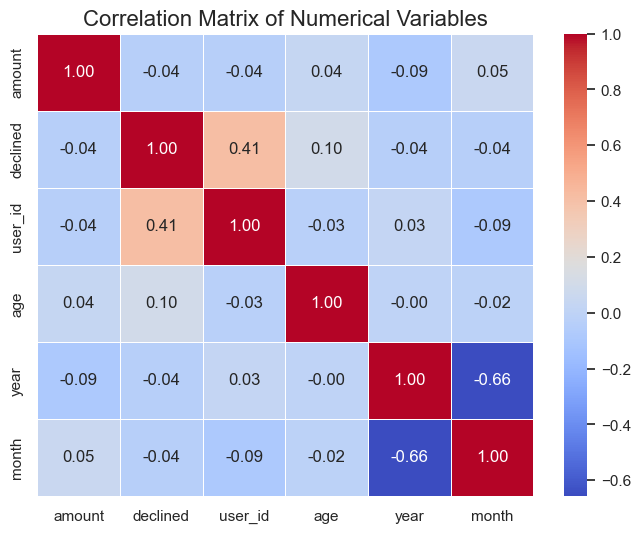

In [426]:
sns.set(style="white")
sns.set_palette("pastel")
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64', 'int32'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()


### **Análisis del gráfico**

El gráfico representa una matriz de correlación entre las variables numéricas presentes en el conjunto de datos. Cada celda muestra el coeficiente de correlación de Pearson entre dos variables, que mide la intensidad y dirección de su relación lineal.  

En nuestro grafico no se observan correlaciones cercanas a ±1, lo que indica que no hay relaciones lineales muy fuertes entre las variables. La mayoría de las variables tienen valores de correlación cercanos a 0, lo que implica relaciones lineales débiles o inexistentes.  
La correlación más significativa es entre **declined** y **user_id** (0.41), lo que podría indicar un patrón donde ciertos usuarios tienen más declinaciones.  
Existe una correlación negativa moderada entre **year** y **month** (-0.66). Esto puede incluir identificar tendencias o patrones estacionales que influyan en las transacciones o declinaciones.  

Se aconseja analizar por qué ciertos usuarios tienen más declinaciones. Esto podría estar relacionado con su comportamiento, tipo de transacciones o políticas del país. Examinar si existe algún problema en los criterios de declinación para estos usuarios.  

## **Exercici 2** Implementa un jointplot  

Siguiendo el análisis de correlación, se ha generado un gráfico de dispersión conjunto (*jointplot*) para explorar posibles patrones entre las variables **declined** y **user_id**.

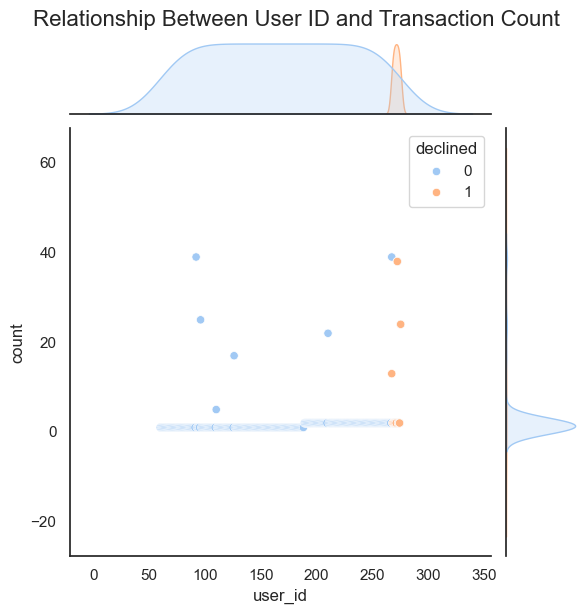

In [674]:
declined_user_id = merged_df.groupby(['user_id', 'declined']).agg(
    total_amount=('amount', 'sum'),
    count=('amount', 'size') 
).reset_index()
sns.jointplot(data=declined_user_id, x='user_id', y='count', hue='declined')
plt.suptitle('Relationship Between User ID and Transaction Count', y=1.02, fontsize=16)
plt.show()


In [439]:
cross_tab_user_id = pd.crosstab(merged_df['user_id'], merged_df['declined_status'])
cross_tab_user_id_sorted = cross_tab_user_id.sort_values(by='Declined', ascending=False)
cross_tab_user_id_sorted.head(10)

declined_status,Accepted,Declined
user_id,,
272,38,38
275,24,24
267,39,13
274,2,2
273,2,2
271,2,2
270,2,2
269,2,2
268,2,2


### **Análisis del gráfico**  
El gráfico muestra la relación entre la variable 'user_id' y el número de transacciones, segmentadas por el estado de la transacción. Cada punto representa a un usuario, y los colores diferencian las transacciones aceptadas (azul) de las rechazadas (naranja). Los puntos están dispersos, indicando que algunos usuarios realizan muchas más transacciones que otros. La densidad en el eje inferior sugiere que una cantidad significativa de usuarios tiene un número bajo de transacciones.  
Las transacciones aceptadas, representadas en azul, son más numerosas y están distribuidas homogéneamente.  
Por otro lado, las transacciones rechazadas, en naranja, están concentradas en unos pocos usuarios, quienes además tienen números de 'user_id' más altos, lo que podría indicar que se trata de clientes más recientes.  

Se recomienda investigar usuarios con transacciones rechazadas elevadas, como aquellos con 'user_id' = 272 y 'user_id' = 275, ya que concentran un alto número de rechazos. Es importante revisar su historial transaccional, analizar las razones de los rechazos y evaluar la posibilidad de actividad fraudulenta. A futuro, sería prudente establecer límites y alertas que identifiquen usuarios con una tasa de rechazos elevada (>50%) para prevenir actividades sospechosas y mejorar los criterios de aceptación.


# **Nivell 3**
## **Exercici 1** Implementa un violinplot combinat amb un altre tipus de gràfic  

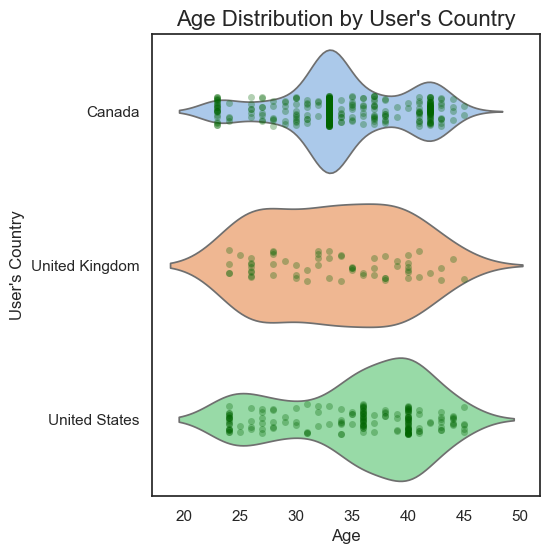

In [578]:
merged_df = merged_df.sort_values(by='country_user', ascending=True)
plt.figure(figsize=(5, 6))
sns.violinplot(data=merged_df, x='age', y='country_user', hue='country_user', palette='pastel', inner=None)
sns.stripplot(data=merged_df, x='age', y='country_user', color='darkgreen', alpha=0.3)
plt.title("Age Distribution by User's Country", fontsize=16)
plt.ylabel("User's Country")
plt.xlabel('Age')
plt.show()


### **Análisis del gráfico**  
El violin plot combinado con stripplot muestra la distribución de edades según el país de los usuarios.

Se observa que los clientes están distribuidos principalmente en Canadá, EE.UU., y Reino Unido.
- Canada tiene distribución de edades más concentrada entre los 30 y 40 años. Fuera de este rango, hay pocos usuarios.
- Reino Unido muestra una distribución más amplia, con edades desde 25 hasta casi 50 años.
- EE.UU. tiene mayor concentración de usuarios entre los 35-40 years.

La diferencia en las distribuciones por país sugiere que cada mercado tiene características demográficas específicas.

Se aconseja adaptar estrategias de marketing considerando las principales edades por país.
Analizar a los usuarios fuera de los rangos predominantes para entender sus necesidades y comportamientos.
Realizar un análisis temporal de las edades para identificar cambios en el perfil de los usuarios.


## **Exercici 2** Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament  

C:\Users\lasso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


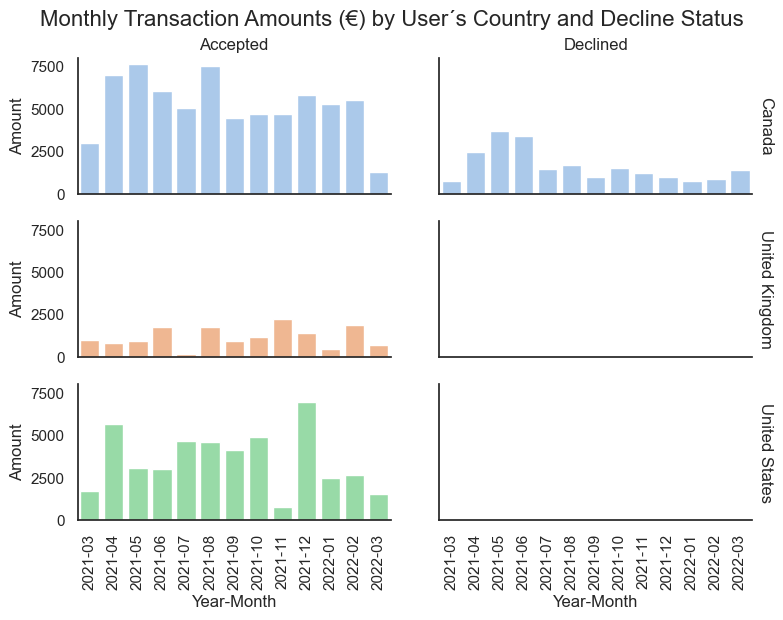

In [590]:
monthly_sales_by_country_user = merged_df.groupby(['year_month', 'country_user','declined_status'])['amount'].sum().reset_index()
g = sns.FacetGrid(monthly_sales_by_country_user, col='declined_status', row='country_user', hue='country_user', height=2, aspect=2, margin_titles=True)
g.map(sns.barplot, 'year_month','amount')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

for ax in g.axes.flatten():
    ax.set_xticks(range(len(monthly_sales_by_country_user['year_month'].unique())))  # Establecer ticks explícitos
    ax.set_xticklabels(monthly_sales_by_country_user['year_month'].unique(), rotation=90, ha='center')  # Rotar etiquetas
g.fig.subplots_adjust(hspace=0.2, top=0.9) 
g.set_axis_labels('Year-Month', 'Amount')
g.fig.suptitle("Monthly Transaction Amounts (€) by User´s Country and Decline Status", fontsize=16)
plt.show()


### **Análisis del gráfico**  
En el gráfico se observan tendencias mensuales de la suma de transacciones por país del usuario, diferenciando entre transacciones aceptadas y declinadas.  

Se destaca que Canadá lidera en volumen de ventas, pero concentra la totalidad de las transacciones rechazadas, lo que podría estar asociado a problemas técnicos o de procesos. A pesar de esto, se observa una tendencia a la disminución de los importes rechazados, lo cual es positivo.
Estados Unidos ocupa el segundo lugar en volumen de transacciones y no presenta problemas relevantes, consolidándose como un mercado confiable.
El Reino Unido, aunque con un desempeño menor, podría representar una oportunidad para implementar estrategias de crecimiento y aumentar su contribución al total de transacciones.

En general, no se observa un patrón claro de estacionalidad o temporalidad en las transacciones.

Se recomienda investigar las razones detrás de las transacciones rechazadas en Canada (problemas técnicos, validación de datos,  restricciones del sistema). Adicionalmente, sería clave investigar las causas detrás de las variaciones mensuales para optimizar las campañas y maximizar la aceptación durante los meses con menor desempeño.